PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


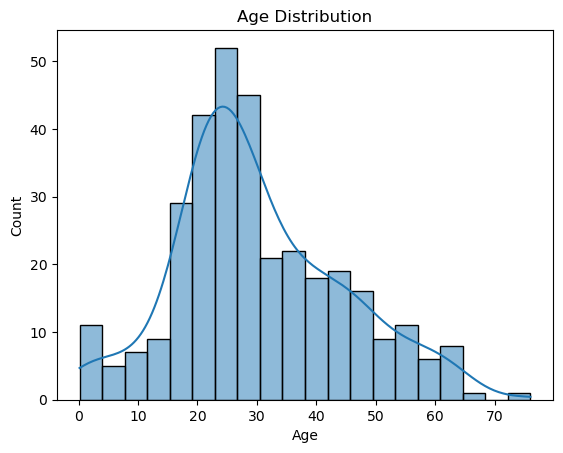

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb

# Load the Titanic dataset
df = pd.read_csv('/Users/kirtisailinaidu/Documents/Data Science Assignment/XGBM & LGBM/Titanic_test.csv')

# Task 1: Exploratory Data Analysis (EDA)
# Check for missing values
print(df.isnull().sum())

# Explore data distributions
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


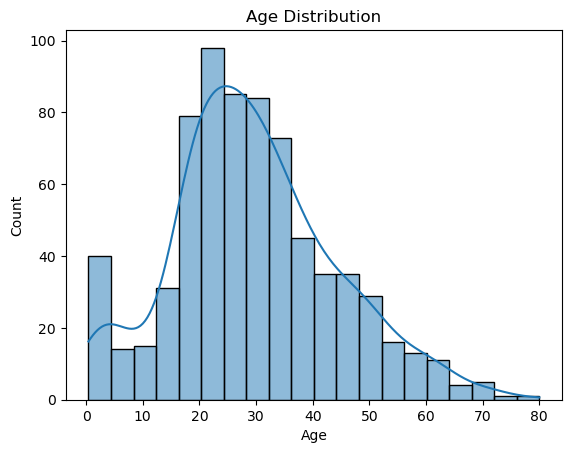

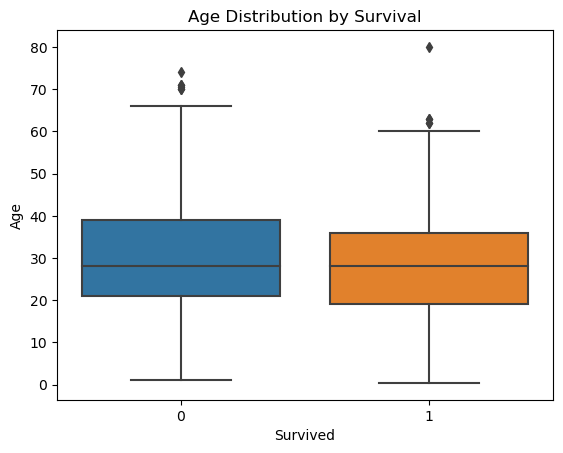

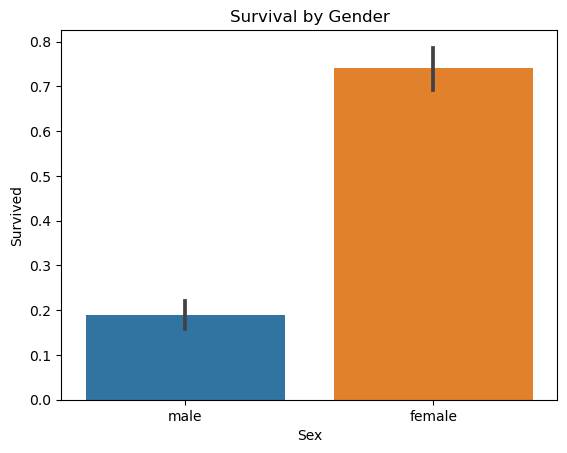

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 430
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb

# Load the Titanic dataset
df = pd.read_csv('/Users/kirtisailinaidu/Documents/Data Science Assignment/XGBM & LGBM/Titanic_train.csv')

# Task 1: Exploratory Data Analysis (EDA)
# Check for missing values
print(df.isnull().sum())

# Explore data distributions
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

# Task 2: Data Preprocessing
# Impute missing values
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])

# Encode categorical variables
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Split the dataset into features and target
X = df.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
y = df['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 3: Building Predictive Models
# LightGBM Model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

# XGBoost Model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Task 4: Model Evaluation
# Define evaluation metrics functions
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

# Evaluate LightGBM model
lgb_accuracy, lgb_precision, lgb_recall, lgb_f1 = evaluate_model(y_test, lgb_pred)

# Evaluate XGBoost model
xgb_accuracy, xgb_precision, xgb_recall, xgb_f1 = evaluate_model(y_test, xgb_pred)

# Task 5: Comparative Analysis
# Compare the performance metrics
print("LightGBM Model Performance:")
print(f"Accuracy: {lgb_accuracy}")
print(f"Precision: {lgb_precision}")
print(f"Recall: {lgb_recall}")
print(f"F1 Score: {lgb_f1}")

print("\nXGBoost Model Performance:")
print(f"Accuracy: {xgb_accuracy}")
print(f"Precision: {xgb_precision}")
print(f"Recall: {xgb_recall}")
print(f"F1 Score: {xgb_f1}")

# Visualize and interpret the results

# Conclusion and Practical Implications